# Load the data
<p>Fonte: https://www.datacamp.com/community/tutorials/cnn-tensorflow-python </p>

In [1]:
# For a specific version:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 34kB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 512kB 41.9MB/s 
     |████████████████████████████████| 3.8MB 39.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=c2d9d37200eb7ebe8a434b1af198d2b7657eeea1e381856afe1beb364279a810
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
import os
# os.environ["CUDA_VISIBLE_DEVICES"]="0" #for training on gpu

<p>A leitura do dataset pede que incluamos a codificação de atributos categóricos, nesse caso utilizaremos o one-hot-encode</p>

In [3]:
data = input_data.read_data_sets('data/fashion',one_hot=True,\
                                 source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 26421880 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 29515 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 4422102 bytes.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 5148 bytes.
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/data

# Analyze the Data

In [4]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=data.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=data.train.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=data.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=data.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [5]:
# Create dictionary of target classes
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

Text(0.5, 1.0, '(Label: Ankle boot)')

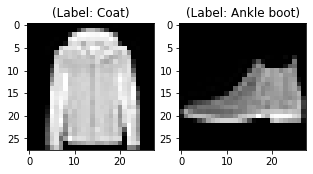

In [6]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(data.train.images[0], (28,28))
curr_lbl = np.argmax(data.train.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(data.test.images[0], (28,28))
curr_lbl = np.argmax(data.test.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# Data Preprocessing

In [7]:
data.train.images[0][500:]

array([0.40784317, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03921569, 0.9568628 ,
       0.8588236 , 0.9803922 , 0.80392164, 0.7803922 , 0.8196079 ,
       0.79215693, 0.8196079 , 0.82745105, 0.7411765 , 0.83921576,
       0.8078432 , 0.8235295 , 0.7843138 , 0.8313726 , 0.6039216 ,
       0.94117653, 0.81568635, 0.8588236 , 0.54901963, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.08235294, 1.        , 0.8705883 , 0.9333334 ,
       0.72156864, 0.8235295 , 0.75294125, 0.8078432 , 0.8196079 ,
       0.8235295 , 0.7411765 , 0.8352942 , 0.82745105, 0.8196079 ,
       0.75294125, 0.8941177 , 0.60784316, 0.8862746 , 0.9333334 ,
       0.9450981 , 0.6509804 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.14509805,
       0.9607844 , 0.8862746 , 0.9450981 , 0.5882353 , 0.7725491 ,
       0.7411765 , 0.8000001 , 0.8196079 , 0.8235295 , 0.71764

In [8]:
np.max(data.train.images[0])

1.0

In [9]:
np.min(data.train.images[0])

0.0

<p>
Vamos remodelar as imagens para que tenham o tamanho 28 x 28 x 1 e alimentar isso como uma entrada para a rede.

O motivo pelo qual você precisa remodelar seus dados é que o Tensorflow espera uma determinada forma de entrada para seu modelo de aprendizado profundo, ou seja, neste caso, uma rede neural de convolução, especificamente:

([number of images], [image x_dim], [image y_dim], [number of channels])

A classe de conjunto de dados usada aqui aparentemente produz uma forma achatada (semelhante a uma lista) para essas imagens, portanto, o comando reshape coloca a estrutura de dados em um tipo com o qual a classe TF pode trabalhar.
</p>

In [10]:
data.train.images.shape, data.test.images.shape

((55000, 784), (10000, 784))

In [11]:
# Reshape training and testing image
train_X = data.train.images.reshape(-1, 28, 28, 1)
test_X = data.test.images.reshape(-1,28,28,1)

train_X.shape, test_X.shape

((55000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
train_y = data.train.labels
test_y = data.test.labels

train_y.shape, test_y.shape

((55000, 10), (10000, 10))

# The Deep Neural Network

<p>Você usará três camadas convolucionais:</p>
<ul>
     <li>A primeira camada terá filtros de 32-3 x 3,</li>
     <li>A segunda camada terá 64-3 x 3 filtros e</li>
     <li>A terceira camada terá 128-3 x 3 filtros.</li>
</ul>

<p>Além disso, existem três camadas de pooling máximo, cada uma com o tamanho 2x2.</p>
<img src="CNN_Schema.png">
<p>Você começa definindo as iterações de treinamento <strong>training_iters</strong>, a taxa de aprendizado <strong>learning_rate</strong> e o tamanho do lote <strong>batch_size</strong>. Lembre-se de que todos esses são hiperparâmetros e não têm valores fixos, pois são diferentes para cada declaração de problema.</p>

In [13]:
training_iters = 10
learning_rate = 0.001
batch_size = 128

# Network Parameters
<p>Em seguida, você precisa definir os parâmetros de rede. Em primeiro lugar, você define o número de entradas. Isso é 784, pois a imagem é inicialmente carregada como um vetor de 784 dimensões. Mais tarde, você verá como vai remodelar o vetor de 784 dimensões para uma matriz de 28 x 28 x 1. Em segundo lugar, você também definirá o número de classes, que nada mais é do que o número de rótulos de classe.</p>

In [14]:
# MNIST data input (img shape: 28*28)
n_input = 28

# MNIST total classes (0-9 digits)
n_classes = 10

#both placeholders are of type float
x = tf.placeholder("float", [None, 28,28,1])
y = tf.placeholder("float", [None, n_classes])

<p>Em seu modelo de arquitetura de rede, você terá várias camadas de convolução e pooling máximo. Nestes casos, é sempre melhor definir as funções de convolução e max-pooling, para que você possa chamá-las quantas vezes quiser para usá-las em sua rede.</p>

In [15]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')

<p>Os pesos para cada camada profunda serão iniciados utilizando o método de Xavier, além disso para cada camada é necessário uma remodelagem que vocês podem ver a explicação nesse <a href="https://www.datacamp.com/community/tutorials/cnn-tensorflow-python">link</a></p>

In [16]:
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()),
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()),
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()),
    'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()),
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()),
}

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



<p>Agora definiremos uma função que irá contruir a arquitetura de nossa rede. A função conv_net () leva 3 argumentos como entrada: a entrada x e os dicionários de pesos e vieses.</p>
<ol>
    <li>Em primeiro lugar, você remodela o vetor de entrada de 784 dimensões para uma matriz de 28 x 28 x 1.</li>
    <li>A seguir, conforme mostrado na figura da arquitetura do modelo, você definirá conv1, que recebe a entrada como uma imagem, pondera wc1 e vieses bc1. Em seguida, você aplica o max-pooling na saída de conv1 e executa um processo análogo a este até conv3.</li>
    <li>Já que sua tarefa é classificar, dada uma imagem, ela pertence a qual rótulo de classe. Assim, depois de passar por todas as camadas de convolução e pooling máximo, você nivelará a saída de conv3. Em seguida, você conectará os neurônios conv3 achatados com cada neurônio na próxima camada. Em seguida, você aplicará a função de ativação na saída da camada fc1 totalmente conectada.</li>
    <li>Finalmente, na última camada, você terá 10 neurônios, já que deve classificar 10 rótulos. Isso significa que você conectará todos os neurônios de fc1 na camada de saída com 10 neurônios na última camada.</li>
</ol>

In [17]:
def conv_net(x, weights, biases):  

    # here we call the conv2d function we had defined above and pass the input image x, weights wc1 and bias bc1.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14 matrix.
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    # here we call the conv2d function we had defined above and pass the input image x, weights wc2 and bias bc2.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 7*7 matrix.
    conv2 = maxpool2d(conv2, k=2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 4*4.
    conv3 = maxpool2d(conv3, k=2)


    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term.
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

<p>Você começará construindo um modelo e chamará a função conv_net () passando a entrada x, pesos e tendências. A função de perda que você usa é a entropia cruzada. O motivo de você usar a entropia cruzada como uma função de perda é que o valor da função de entropia cruzada é sempre positivo e tende a zero conforme o neurônio fica melhor em computar a saída desejada, y, para todas as entradas de treinamento, x.</p>

In [18]:
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [19]:
#Here, you check whether the index of the maximum value of the predicted image is equal to the actual labeled image. And both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [20]:
# Initializing the variables
init = tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(training_iters):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
        print("Optimization Finished!")

        # Calculate accuracy for all 10000 mnist test images
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))
    summary_writer.close()

Iter 0, Loss= 0.378434, Training Accuracy= 0.84375
Optimization Finished!
Testing Accuracy: 0.83560
Iter 1, Loss= 0.214453, Training Accuracy= 0.91406
Optimization Finished!
Testing Accuracy: 0.87230
Iter 2, Loss= 0.161259, Training Accuracy= 0.95312
Optimization Finished!
Testing Accuracy: 0.88660
Iter 3, Loss= 0.141275, Training Accuracy= 0.95312
Optimization Finished!
Testing Accuracy: 0.89440
Iter 4, Loss= 0.118312, Training Accuracy= 0.97656
Optimization Finished!
Testing Accuracy: 0.89490
Iter 5, Loss= 0.116397, Training Accuracy= 0.96875
Optimization Finished!
Testing Accuracy: 0.89570
Iter 6, Loss= 0.115784, Training Accuracy= 0.96094
Optimization Finished!
Testing Accuracy: 0.89650
Iter 7, Loss= 0.120672, Training Accuracy= 0.96094
Optimization Finished!
Testing Accuracy: 0.89610
Iter 8, Loss= 0.134488, Training Accuracy= 0.93750
Optimization Finished!
Testing Accuracy: 0.90120
Iter 9, Loss= 0.128168, Training Accuracy= 0.96094
Optimization Finished!
Testing Accuracy: 0.90200


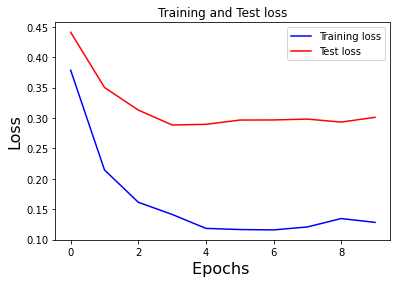

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

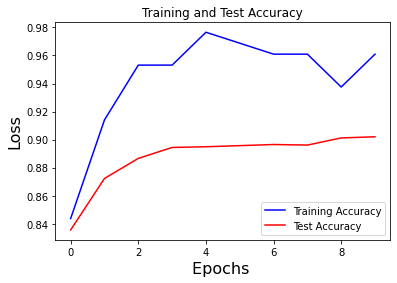

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()